In [4]:
import pandas as pd

In [5]:
files = [
    r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\Reported-UAS-Sightings-January-March-2022_0.xlsx',
    r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\Reported-UAS-Sightings-April-June-2022.xlsx',
    r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\Reported-UAS-Sightings-July-Sept-2022.xlsx'
]


In [ ]:
dfs = []
for file in files:
    df = pd.read_excel(file)
    dfs.append(df)


In [7]:
drone_df = pd.concat(dfs, ignore_index=True)

In [8]:
print(drone_df.shape)
drone_df.head()


(1542, 5)


,Day of Sighting,State,City,Summary,Date
0,1/1/2022,FLORIDA,ORLANDO,"PRELIM INFO FROM FAA OPS: ORLANDO, FL/UAS INCI...",NaT
1,1/1/2022,TEXAS,HOUSTON,"PRELIM INFO FROM FAA OPS: HOUSTON, TX/UAS INCI...",NaT
2,1/1/2022,FLORIDA,FORT LAUDERDALE,"PRELIM INFO FROM FAA OPS: FORT LAUDERDALE, FL/...",NaT
3,1/1/2022,FLORIDA,ORLANDO,"PRELIM INFO FROM FAA OPS: ORLANDO, FL/UAS INCI...",NaT
4,1/1/2022,FLORIDA,TALLAHASSEE,"PRELIM INFO FROM FAA OPS: TALLAHASSEE, FL/UAS ...",NaT


In [ ]:

drone_df.columns


Index(['Day of Sighting', 'State', 'City', 'Summary', 'Date'], dtype='object')

In [11]:

columns_to_keep = ['City', 'State', 'Date', 'Day of Sighting', 'Summary']
drone_df = drone_df[columns_to_keep]



change date format and drop rows

In [ ]:
drone_df['datetime'] = pd.to_datetime(drone_df['Date'], errors='coerce')

drone_df = drone_df.dropna(subset=['datetime'])

drone_df['year'] = drone_df['datetime'].dt.year
drone_df['month'] = drone_df['datetime'].dt.month


find sightings in each state

In [14]:

drone_df['State'].value_counts().head(10)


State
NEW YORK        57
FLORIDA         55
CALIFORNIA      46
TEXAS           36
PENNSYLVANIA    24
WASHINGTON      18
GEORGIA         17
ILLINOIS        16
NEW JERSEY      15
COLORADO        14
Name: count, dtype: int64

#sightings per month

In [15]:
drone_df['month'].value_counts().sort_index()

month
7    166
8    186
9    139
Name: count, dtype: int64

In [16]:
drone_df.to_csv(r'C:\Users\opiej\ufo-analysis-capstone\ufo-analysis-capstone\data\cleaned_drone_data.csv', index=False)


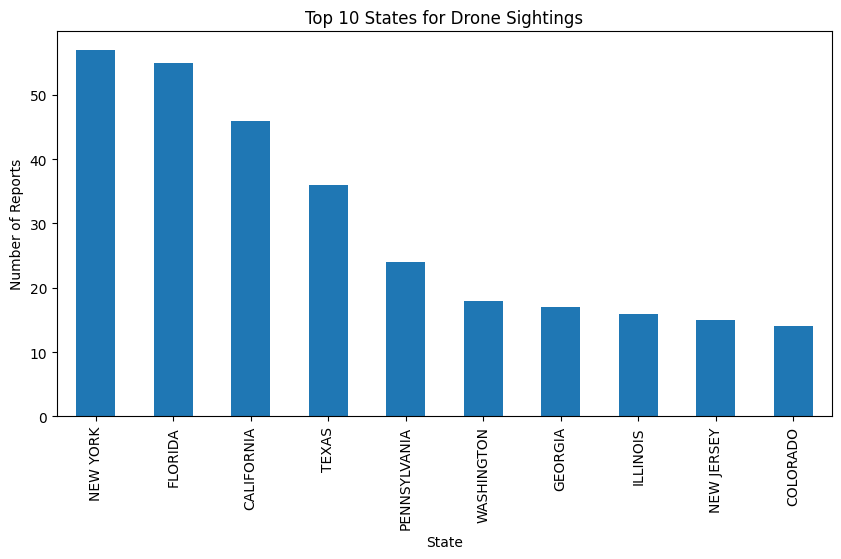

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
drone_df['State'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States for Drone Sightings')
plt.ylabel('Number of Reports')
plt.xlabel('State')
plt.show()